# Food analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data_16_04.csv")
df.head(10)

'#1.Step: Create a new colum with ratio in hecto'
df["ratio_raw"] = df["Calorie"]/df["Steps."]*100

'#2.Step: Calculate the weight diff'
df["diff"] = df ["Weight"].diff()
'#2.2.Step: Shift the weight diff one day back'
df["diff_one_day"] = df ["Weight"].diff().shift(+1)
df.head(10)
'#3.Step: Calculate a col which shows if lost weight'
df["lost_weight"]=None
df["lost_weight"].loc[df["diff_one_day"]>0]=True
df["lost_weight"].loc[df["lost_weight"]!=True]=False
df.head(-1)




/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight
0,16/04/2020,84.9,30000,1299,4.330000,NaN,NaN,False
1,15/04/2020,85.2,30500,1453,4.763934,0.3,NaN,False
2,14/04/2020,86.1,32200,1602,4.975155,0.9,0.3,True
3,13/04/2020,86.7,29000,1711,5.900000,0.6,0.9,True
4,12/04/2020,86.7,28000,1850,6.607143,0.0,0.6,True
5,11/04/2020,86.5,26585,2144,8.064698,-0.2,0.0,False
6,10/04/2020,86.7,14500,2726,18.800000,0.2,-0.2,False
7,09/04/2020,87.1,27439,1320,4.810671,0.4,0.2,True
8,08/04/2020,87.7,29787,1609,5.401685,0.6,0.4,True
9,07/04/2020,87.9,26370,1358,5.149791,0.2,0.6,True


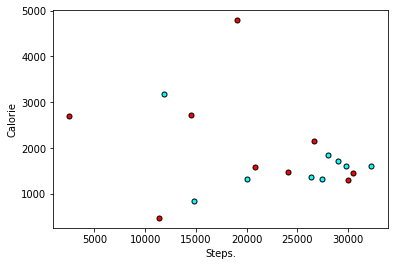

/home/wlg1fe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight,diff_norm
1,15/04/2020,85.2,30500,1453,4.763934,0.3,NaN,False,39.285714
2,14/04/2020,86.1,32200,1602,4.975155,0.9,0.3,True,60.714286
3,13/04/2020,86.7,29000,1711,5.900000,0.6,0.9,True,50.000000
4,12/04/2020,86.7,28000,1850,6.607143,0.0,0.6,True,28.571429
5,11/04/2020,86.5,26585,2144,8.064698,-0.2,0.0,False,21.428571
6,10/04/2020,86.7,14500,2726,18.800000,0.2,-0.2,False,35.714286
7,09/04/2020,87.1,27439,1320,4.810671,0.4,0.2,True,42.857143
8,08/04/2020,87.7,29787,1609,5.401685,0.6,0.4,True,50.000000
9,07/04/2020,87.9,26370,1358,5.149791,0.2,0.6,True,35.714286
10,06/04/2020,88.3,20050,1320,6.583541,0.4,0.2,True,42.857143


In [3]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(dataframe,in_x1,in_x2,de_y):
    X = np.array(dataframe[[in_x1,in_x2]])
    y = np.array(dataframe[de_y])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(in_x1)
    plt.ylabel(in_x2)
    
# Plotting the points

plot_points(df,"Steps.","Calorie","lost_weight")

plt.show()


from sklearn import preprocessing 
cm = plt.cm.get_cmap('tab20c')


df_nan = df.loc[df["diff"].notnull()]
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df_nan["diff_norm"]=min_max_scaler.fit_transform(df_nan[["diff"]])*100
df_nan.head(10)

<IPython.core.display.Javascript object>


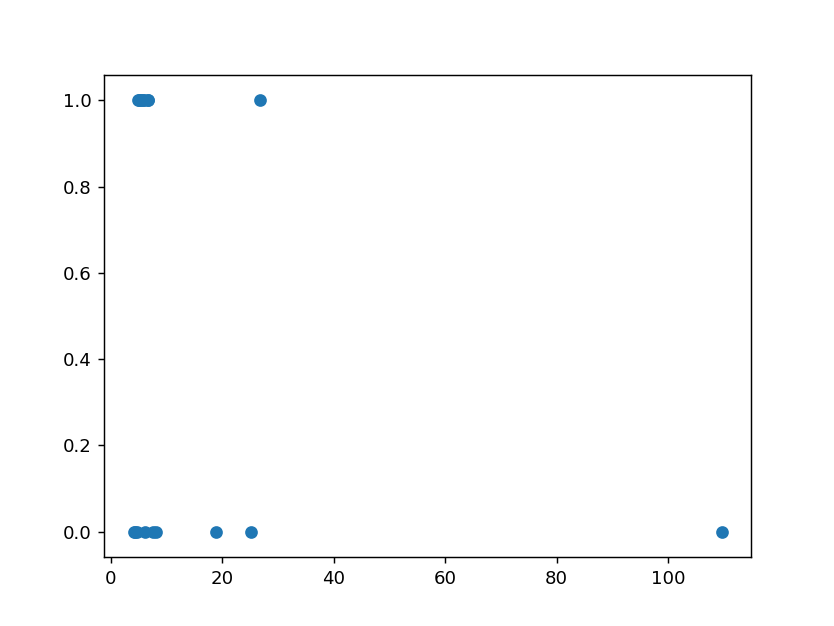

In [4]:
%matplotlib notebook
plt.scatter(df["ratio_raw"],df["lost_weight"])
plt.show()

In [90]:
df.head()

,Date,Weight,Steps.,Calorie,ratio_raw,diff,diff_one_day,lost_weight
0,16/04/2020,84.9,30000,1299,4.330000,NaN,NaN,False
1,15/04/2020,85.2,30500,1453,4.763934,0.3,NaN,False
2,14/04/2020,86.1,32200,1602,4.975155,0.9,0.3,True
3,13/04/2020,86.7,29000,1711,5.900000,0.6,0.9,True
4,12/04/2020,86.7,28000,1850,6.607143,0.0,0.6,True


In [121]:
plt.scatter(df_nan["Steps."],df_nan["Calorie"],c =df_nan.diff_norm, s=df_nan.diff_norm,
           cmap=cm)
plt.show()

/home/wlg1fe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


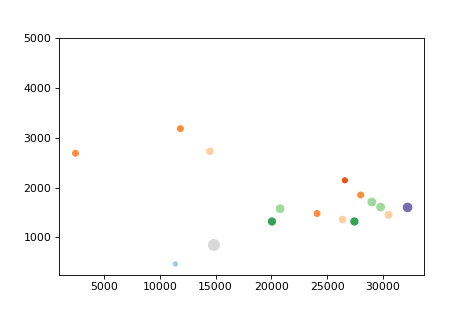

In [124]:
from sklearn import preprocessing 
cm = plt.cm.get_cmap('tab20c')


df_nan = df.loc[df["diff"].notnull()]
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df_nan["diff_norm"]=min_max_scaler.fit_transform(df_nan[["diff"]])*100
df_nan.head()
plt.scatter(df_nan["Steps."],df_nan["Calorie"],c =df_nan.diff_norm, s=df_nan.diff_norm,
           cmap=cm)
plt.show()

## WeightWar

In [93]:
import os 
import pandas as pd 
import sqlite3
'#1.Step: Read the table'
db_conn =sqlite3.connect('weight_15_09_18__18_04_20.db')

table = pd.read_sql_query("SELECT * FROM weightdatum",db_conn)
'#2.Step:Show table'
table.head(10)

,_id,w_date,w_weight,w_fat,w_exer,w_drunk,w_val_a,w_val_b,w_val_c,w_check_a,w_check_b,w_check_c,w_memo
0,1,2018-09-12,8310,0,false,false,0,0,0,false,false,false,
1,2,2018-09-13,8240,0,false,false,0,0,0,false,false,false,
2,3,2018-09-14,8270,0,false,false,0,0,0,false,false,false,
3,4,2018-09-17,8300,0,false,false,0,0,0,false,false,false,
4,5,2018-09-16,8400,0,false,false,0,0,0,false,false,false,
5,6,2018-09-15,0,0,false,false,0,0,0,false,false,false,
6,7,2018-09-18,8250,0,true,false,0,0,0,false,false,false,- 1 Stuck Apfelkuchen
7,8,2018-09-19,8240,0,false,false,0,0,0,false,false,false,
8,9,2018-09-20,8400,0,false,false,0,0,0,false,false,false,
9,10,2018-09-21,8170,0,false,false,0,0,0,false,false,false,


In [102]:
'#3.Step: Analyse the interessting column the w_eight w_date'
from IPython.display import display
df = table[["w_weight","w_date"]]


'#3.1.Step: Preprocessing: Change the type of the column'
df.loc[:,"w_weight_int"]= df["w_weight"].astype('int32')/100
df.loc[:,"w_date_date"] = pd.to_datetime(df["w_date"])


'#3.2.Step: Drop 0 values'
df_none_zero = df.loc[df["w_weight_int"]!=0]

df_finish = df_none_zero[["w_weight_int","w_date_date"]]


display(df_finish.describe())

print("Overal stats")

/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/wlg1fe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,w_weight_int
count,325.000000
mean,87.764677
std,1.888416
min,81.700000
25%,86.500000
50%,88.200000
75%,89.100000
max,91.220000


Overal stats


In [140]:
for year,i in zip([2018,2019,2020],[1,2,3]) :
    print(i)
    print(year)

1
2018
2
2019
3
2020


<IPython.core.display.Javascript object>


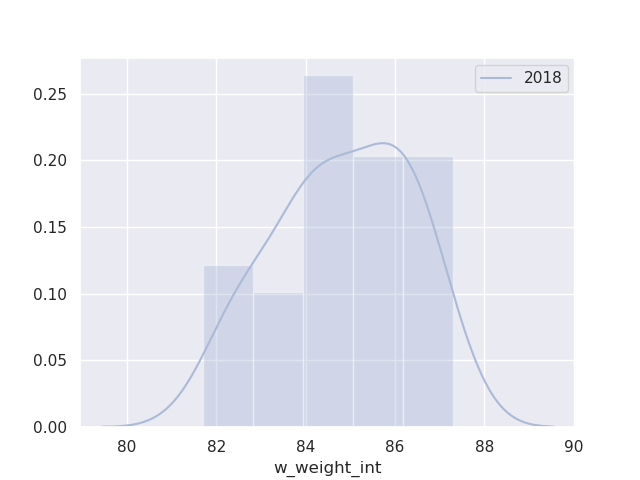

Year: 2018


,w_weight_int
count,44.000000
mean,84.845455
std,1.504328
min,81.700000
25%,83.950000
50%,84.950000
75%,86.100000
max,87.300000


<IPython.core.display.Javascript object>


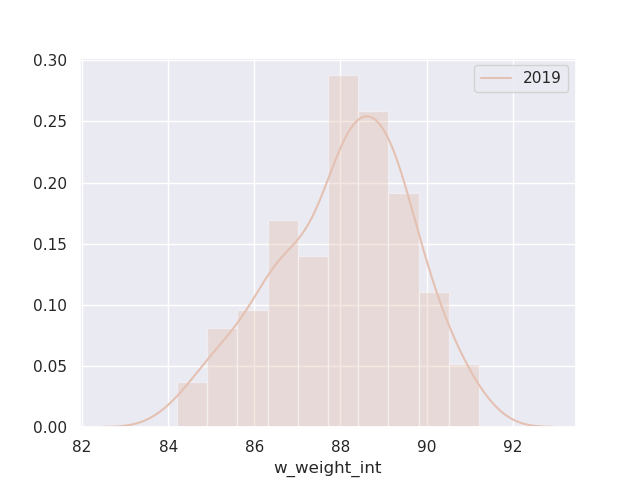

Year: 2019


,w_weight_int
count,193.000000
mean,88.062280
std,1.558277
min,84.200000
25%,87.000000
50%,88.300000
75%,89.100000
max,91.220000


<IPython.core.display.Javascript object>

Year: 2020


,w_weight_int
count,88.000000
mean,88.571591
std,1.279992
min,84.900000
25%,88.000000
50%,88.700000
75%,89.400000
max,91.200000


In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
'#Show the stats for each year'

for year,i in zip([2018,2019,2020],[1,2,3]) :
    plt.figure(year)
    hist_color=["dummy","#aabad7","#e4c1b2","#aecfba"]
    print(f"Year: {year}")
    df_year = df_finish.loc[df_finish["w_date_date"].dt.year==year]
    display(df_year.describe())
    sns.distplot(df_year.w_weight_int,kde_kws={ "label": year,"color":hist_color[i]},  hist_kws={"color":hist_color[i]});
    plt.show()
    print("=="*15)
    
    


In [145]:
for year,i in zip([2018,2019,2020],[1,2,3]) :

    print(f"Year: {year}")
    plt.figure(5)
    hist_color=["dummy","#aabad7","#e4c1b2","#aecfba"]
    df_year = df_finish.loc[df_finish["w_date_date"].dt.year==year]
    sns.distplot(df_year.w_weight_int,kde_kws={ "label": year}, hist_kws={"color":hist_color[i]});
    plt.show()
    print("=="*15)

Year: 2018


<IPython.core.display.Javascript object>

Year: 2019
Year: 2020


<IPython.core.display.Javascript object>


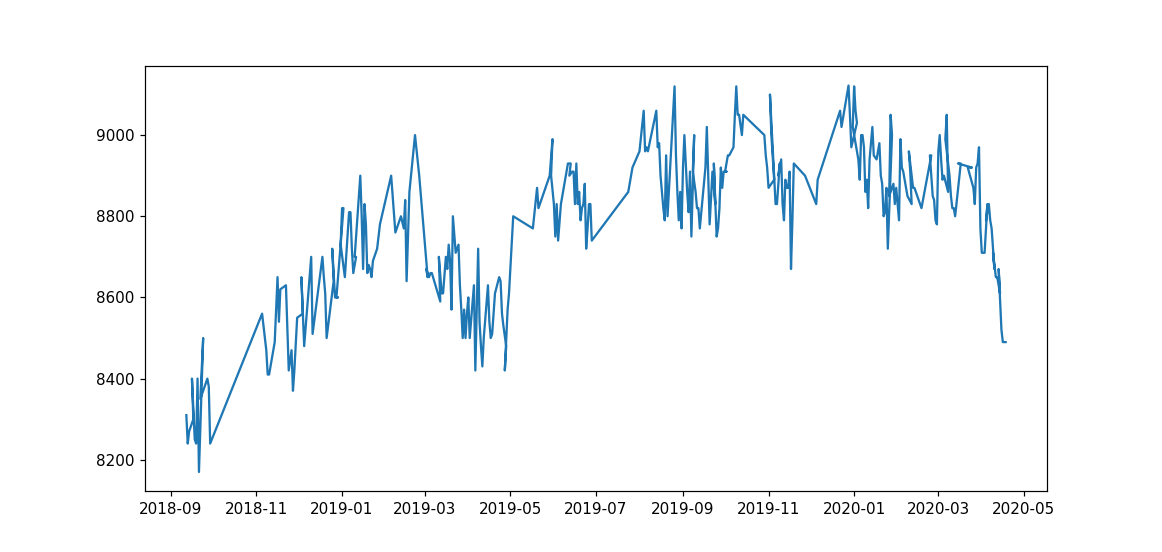

In [100]:
'#.Plot result'
import matplotlib.pyplot as plt

plt.plot(df_finish["w_date_date"],df_finish["w_weight_int"])


